In [1]:
%matplotlib inline

In [2]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

sns.set(style="whitegrid")

# Problem Set 4

## Directions

1. Show all work/steps/calculations using a combination of code and Markdown.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Lectures, *Fundamentals*, and Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results.**

**Submission**

For this assignment...

0. Complete the pre-submission checklist at the end of the notebook.
1. Name the notebook to be your JHED ID, ie, `ssmith1.ipynb`. Do not add anything else to the name.
2. Upload to Canvas.

Do not add anything to the names like " Problem Set 2".
Any assignment not following the submission guidelines will generally be assumed to be incomplete under the Syllabus and therefore a "C".
Do not return the data set.
Do not return the eda.py file.

## Introduction


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>This Problem Set covers Lab 7.</p>
    <p>You <em>must</em> use Bayesian inference on all five problems of this Problem Set. Specifically, you must use the Non-Parametric Bootstrap to estimate posterior distributions (Problems 1-4) There should be no p-values or confidence intervals <em>at all.</em> No Frequentist inference.<p>
</div>


Lab 7 was all about statistical inference, specifically, Bayesian statistical inference. 

We start with some "pregame" questions.
You should answer each of these in the Markdown cell provided.
Be specific and to the point.

The problems are designed to get progressively more difficult.

* <a href="#q1">Problem 1<a>
* <a href="#q2">Problem 2<a>
* <a href="#q3">Problem 3<a>
* <a href="#q4">Problem 4<a> 
* <a href="#q5">Problem 5<a> 
  
You can add more cells (markdown/code) but do not change the labeling or ordering of the existing cells.

## Pregame

### Question 1. What kinds of questions can we answer using the posterior distribution? Be specific and list all of them.

The posterior distribution allows us to ask the question: 'Are the results believeable?' It allows us to find uncertainty in each of our values for a parameter or model. In other words, if $\theta$ is our model or set of models, the posterior $P(\theta | D)$, is the distribution of the models given the data.

In addition to the uncertainty in our parameter's values, we can also us the posterior distribution to calculate the probability of the Region of Practical Equivalence (ROPE). 

We can ask what probability is associated with a particular value or interval. Specifically: <br>
What is the probability of $\theta$ being x or larger? <br>
What is the probability of $\theta$ being x or less? <br>
What is the probability of $\theta$ being x to y?

We can also ask questions going from probability to value: <br>
What value is associated with a probability or higher?
What value is associated with a probability or lower?
What interval is associated with a particular probability?

### Question 2. What role does an N% Credible Interval play in Bayesian inference? Is it the primary method of inference in Bayesian statistics?

An N% Credible Interval is the N% probability a true parameter's value falls between a particular interval or range, based on the data. It has a slightly different interpretation than a Frequentist Confidence Interval. I believe it is the primary method of inference in Bayesian statistics. Our posterior distribution tells us what we need to know about our uncertainty in $\theta$.

### Question 3. About the Regional of Practical Equivalence (ROPE)...

1. In your own words, what is the ROPE?
2. What kind of information do we use to define the ROPE?

1. The ROPE is a range of values that we would be okay with in order to not change our beliefs in our model. Or at least the range of values we would find "acceptable" (I use acceptable loosely here, as I do not mean we are accepting or rejecting any values here, as we might do with a null model in a Frequentist approach).

2. ROPE comes from our domain knowledge, not the data.

<a id="q1"></a>
## Problem 1
---


You recently surveyed your customers in a marketing campaign to determine if they would be willing to switch from emails to text alerts. You have previously broken your customers into two groups "Beer" lovers and "Wine" lovers.

The results are below:

```
                        Response
                        No   Yes  Total
       Segments    Wine  18  82  100
                   Beer  53  47  100
                   Total 71 129  200
```
As you analyze the data, you note that the overall percentage of customers who would be willing to get text messages instead of emails is 64.5% (129/200). Engineering and Marketing have established that in order for the switch (from email to SMS texts) to be cost effective, the proportion of customers will to switch had to be at least 60%.

Because 64.5% is greater than 60.0%, the results of the survey are interesting ("meaningful") but how believable are they?


### Problem 1.1

Let $\theta$ be the percent of the total that responded yes, estimate the posterior distribution of P($\theta$|Data).

Start by recreating the data. Note I will round $\theta$ as 65% to make working with the arrays easier.

In [3]:
np.random.seed([281732])

theta_yes = 0.65
data = [1] * 65 + [0] * 35
np.random.shuffle(data)
print(data[0:20])
print(f'Mean: {np.mean(data)}')

[1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1]
Mean: 0.65


Just making sure we set up our data correctly. Now we can generate our posterior distribution using Bootstrap sampling. Note I am copying the `bootstrap_sample` function from *Lab 7 - Solution.ipynb*.

In [4]:
def bootstrap_sample(data, f, n=100):
    result = []
    m = len(data)
    for _ in range(n):
        sample = np.random.choice(data, len(data), replace=True)
        r = f(sample)
        result.append(r)
    return np.array(result)

In [5]:
posterior = bootstrap_sample(data, np.mean, 1000)
posterior[0:20]

array([0.63, 0.59, 0.72, 0.73, 0.63, 0.65, 0.62, 0.61, 0.73, 0.68, 0.75,
       0.67, 0.56, 0.7 , 0.66, 0.61, 0.69, 0.67, 0.7 , 0.63])

Finally, we can create a histogram to visualize our posterior distribution

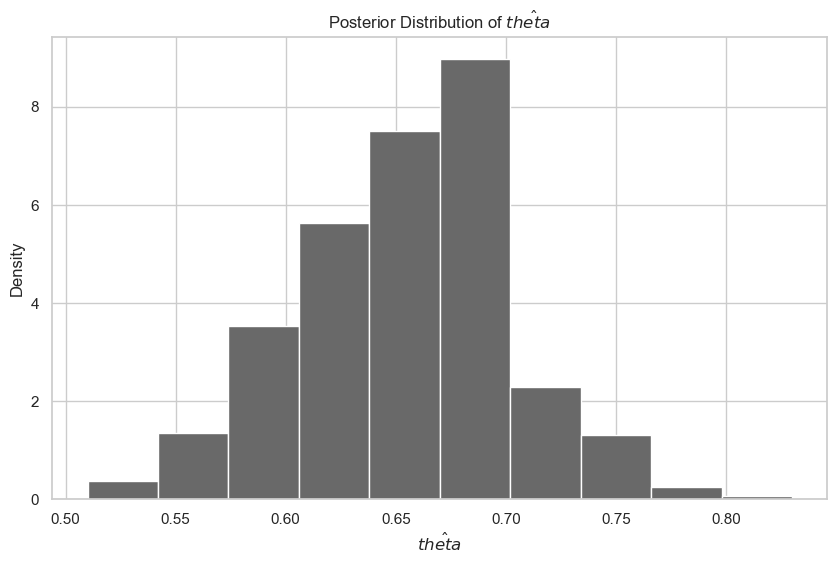

In [6]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

axes.hist(posterior, density=True, color="dimgray")
axes.set_ylabel("Density")
axes.set_xlabel("$\hat{theta}$")
axes.set_title("Posterior Distribution of $\hat{theta}$")

plt.show()
plt.close()

We see a somewhat symmetric posterior distribution, noting the highest density between $\hat{\theta}$ of 0.65-0.70.

### Problem 1.2

What is the 95% credible interval for $\theta$? Interpret it.

In [7]:
stats.mstats.mquantiles(posterior, [0.025, 0.975])

array([0.56, 0.75])

The 95% credible interval is 0.56-0.75, meaning there is a 95% probability that the true value of $\theta$ lies between 0.56-0.75, based on the data. (There is a 95% chance the percentage of people willing to switch from email to text alerts falls between 56-75%).

### Problem 1.3

Because the threshold was set at 60%, any percentage at 60% or greater is "practically equivalent" (we don't care how far above 60% it is as long as it's at least 60%). What is the probability of this ROPE? Interpret your result.

In [8]:
np.mean(0.60 <= posterior)

0.88

We have an 88% probability that the percentage of people who would be willing to switch from email to text alerts is at least 60%. What marketing would want to see, surely.

### Problem 1.4

Even though the overall results appear to be satisfactory, Marketing is concerned we may lose Beer drinkers (ie, they believe the 53% "no" is meaningful). To what degree is the result believable for Beer drinkers. Discuss your results.

We can recreate the data just as we did above, but using a $\theta$ to represent the percentage of beer drinkers who said no.

In [9]:
np.random.seed([147739])

theta_no = 0.53
data = [1] * 53 + [0] * 47
np.random.shuffle(data)
print(data[0:20])
print(f'Mean: {np.mean(data)}')

[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]
Mean: 0.53


Now we calculate the posterior distribution

In [10]:
posterior = bootstrap_sample(data, np.mean, 1000)
posterior[0:20]

array([0.53, 0.51, 0.52, 0.43, 0.53, 0.49, 0.52, 0.48, 0.53, 0.52, 0.52,
       0.45, 0.61, 0.59, 0.48, 0.49, 0.39, 0.54, 0.57, 0.54])

We can create a histogram as well

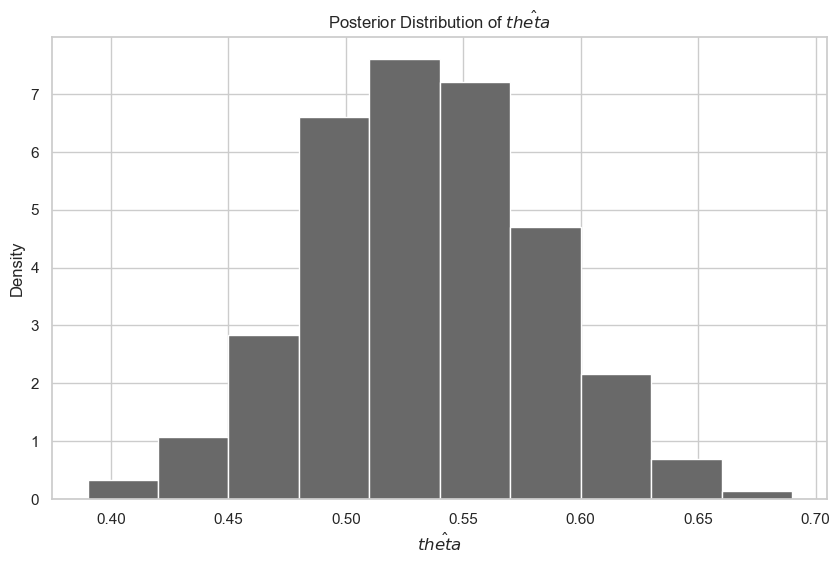

In [11]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

axes.hist(posterior, density=True, color="dimgray")
axes.set_ylabel("Density")
axes.set_xlabel("$\hat{theta}$")
axes.set_title("Posterior Distribution of $\hat{theta}$")

plt.show()
plt.close()

Again we see a fairly symmetric distribution here. Let's calculate the 95% credible interval for $\theta$

In [12]:
stats.mstats.mquantiles(posterior, [0.025, 0.975])

array([0.44   , 0.62595])

There is a 95% probability the percentage of beer drinkers not willing to switch from email to text alerts falls within 44% to 62.6%, based on the data. I believe the result we saw for beer drinkers not willing to switch (53%) is reasonable based on this 95% credible interval.

We could also consider looking at the probability of a ROPE if we had more domain knowledge about our beer drinkers.

<a id="q2"></a>
## Problem 2

---

Fifteen volunteers were put on the Supper Dooper Human Kibble Diet(tm) for a month. They were weighed at the start and again after 30 days. Thus you can take `data1["start"][0]` and `data1["end"][0]` to be the weight of the same person with the first measurement at the start and the second measurement at the end of 30 days, etc. Thus, the people in "start" and the people in "end" *are* the same.

The makers of The Super Dooper Human Kibble Diet(tm) are anxious to see the results of this study because they are planning to offer a money back guarantee of "Lose at least 10 Pounds in 30 days or your money back!"

First, make very sure you're clear on what this question is really asking...there's two ways to interpret it and only one is right. 

Based on the data, answer the following questions:

In [36]:
data2 = {}
data2["start"] = np.array([129, 174, 200, 229, 205, 133, 143, 222, 161, 201, 194, 181, 185, 126, 212])
data2["end"] = np.array([134, 171, 190, 227, 206, 130, 129, 218, 138, 187, 191, 177, 183, 124, 205])

### Problem 2.1

What is the probability that Super Dooper Human Kibble can make this claim (ie, how believable is it)?

We can look at the mean difference in weight for each person between the start and at the end of the 30 days.

In [37]:
print('start', np.mean(data2['start']))
print('end', np.mean(data2['end']))

start 179.66666666666666
end 174.0


We see a difference of about a 5.6 pound loss from the start of the experiment to the end.

Now we can perform resampling for a posterior, note I'll be using the `resample` function from *Fundamentals, Page 670*.

In [38]:
import random

In [39]:
def resample(data):
    n = len(data)
    return [data[i] for i in [random.randint(0, n-1) for _ in range(0, n) ]]

I think we should be only resampling the difference here, as we wouldn't want to resample data for the individual start and ends, and wind up with a difference for a person who is starting out at 212 pounds to show an end weight of 134 pounds.

In [50]:
data2['difference'] = data2['start'] - data2['end']
print(data2['difference'])
print(np.mean(data2['difference']))

[-5  3 10  2 -1  3 14  4 23 14  3  4  2  2  7]
5.666666666666667


In [53]:
np.random.seed([399207])

posterior = bootstrap_sample(data2['difference'], np.mean, 1000)
posterior[0:20]

array([ 7.33333333,  5.73333333,  5.8       ,  2.93333333,  4.8       ,
        6.46666667,  9.66666667,  4.4       ,  5.66666667,  3.06666667,
        3.33333333,  7.73333333,  5.66666667, 11.73333333,  9.2       ,
        6.8       ,  7.4       ,  8.86666667,  5.        ,  4.2       ])

We can look at histograms as well for a visualization

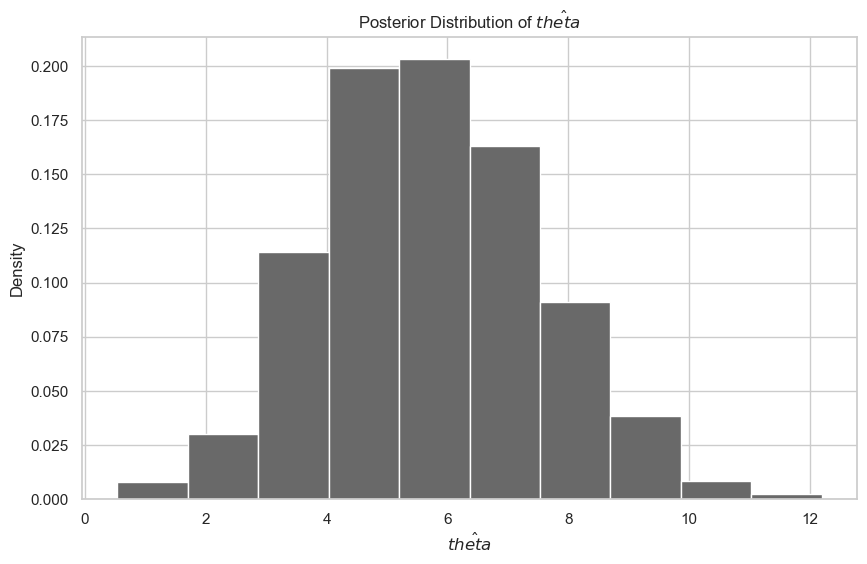

In [54]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

axes.hist(posterior, density=True, color="dimgray")
axes.set_ylabel("Density")
axes.set_xlabel("$\hat{theta}$")
axes.set_title("Posterior Distribution of $\hat{theta}$")

plt.show()
plt.close()

We see our histogram is centered just below 6, which makes sense since our initial mean was 5.6.

Now we can look at the probability the difference was greater than 10, as well as the 95% credible interval.

In [57]:
print('P(difference) > 10 pounds', np.mean(posterior >= 10))
print('95% CI', stats.mstats.mquantiles(posterior, [0.025, 0.975]))

P(difference) > 10 pounds 0.012
95% CI [2.4        9.46666667]


Only about a 1.2% chance the difference is greater than 10 pounds, and a 95% probabillity the difference lies between 2.4 and 9.5 pounds.

### Problem 2.2

How likely is it that the diet doesn't work at all (zero weight loss? How would you define that? Assume that your weight fluctuates within a 5 pound band/range (+/- 2.5 pounds).

In [58]:
np.mean((-2.5 <= posterior) & (posterior <= 2.5))

0.029

We see about 2.9% chance the difference in weight is between -2.5 and 2.5 pounds

### Problem 2.3

How likely is it that you actually gain weight under the diet? Again, assume that your weight fluctuates about 5 pounds around your your "true" weight (both over and under, evenly).

Similar to 2.2, we can look at the posterior mean for the difference in weights that are below -2.5 (having gained at least 2.5 pounds)

In [66]:
np.mean((posterior <= -2.5))

0.0

The probability is shown as zero, however we know an event in which a person might gain more than 2.5 pounds in 30 days is not impossible. Instead, we might surmise that our bootstrap cannot correctly interpret this result, and we would look to domain knowledge. We know that there are a lot of factors that might influence weight ourside of diet, including genetics, stress, and exercise, which may not be accounted for here.

### Problem 2.4

The Lawyers and Accountants have re-crunched the numbers and the legal terms. If the diet doesn't "work" for 10 pounds, what value (threshold) will the diet work for at least 66% of the time? That is, what value can we substitute for "10 pounds" in our money back guarantee that will be true at least 66% of the time?

We can use inverse survival function here to answer this question

In [73]:
stats.norm.isf([0.66], np.mean(posterior), np.std(posterior))

array([4.96394989])

We would be able to substitute 4.96, or roughly 5 pounds. That is, we are likely to see a weight loss of 5 pounds or more with 66% probability.

<a id="q3"></a>
## Problem 3

---

The Data Science Team at Acme Company has developed a new engagement algorithm they believe will be more effective than the current one. To test the new algorithm they conducted an A/B test for two groups of 100 users each, selected at random, over a week. 

In order for the change to be cost effective, visitors need to spend at least 5 minutes more per week on the website under the new algorithm.

The data is provided below (the people in "old" and the people in "new" are *not* the same) and measured in "minutes spent on the website during the week".

In [14]:
data3 = {}
data3["old"] = [161, 184, 138, 178, 188, 175, 195, 214, 183, 184, 195, 196, 150, 206, 185, 202, 216, 186, 153, 174, 217, 217, 178, 172, 205, 192, 172, 222, 197, 174, 163, 206, 176, 176, 230, 202, 267, 186, 190, 200, 182, 160, 225, 185, 205, 213, 189, 171, 166, 239, 170, 198, 198, 198, 211, 194, 197, 212, 194, 236, 163, 218, 221, 189, 182, 182, 202, 172, 165, 180, 214, 186, 191, 179, 191, 204, 209, 212, 141, 188, 193, 192, 185, 199, 144, 146, 231, 201, 177, 191, 197, 182, 174, 231, 202, 195, 161, 187, 181, 186]
data3["new"] = [196, 245, 196, 243, 181, 161, 173, 151, 148, 195, 247, 164, 167, 234, 200, 215, 204, 190, 148, 127, 174, 135, 231, 199, 125, 138, 140, 206, 139, 177, 260, 231, 173, 172, 178, 224, 186, 115, 144, 222, 189, 107, 239, 124, 216, 169, 212, 262, 145, 221, 179, 192, 142, 232, 171, 233, 287, 216, 188, 156, 169, 238, 128, 155, 202, 174, 229, 198, 192, 169, 156, 238, 178, 220, 177, 191, 234, 251, 166, 123, 144, 127, 203, 230, 203, 188, 185, 255, 239, 227, 173, 196, 208, 236, 194, 204, 217, 252, 169, 166]

Based on the data, fully analyze the A/B test. You will be graded on the completeness and thoroughness of your analysis. You should make sure you include:

1. BCI
2. ROPE
3. ?

### Problem 3.1

Calculate the 95% BCI and interpret it.

### Problem 3.2

Calculate the ROPE and interpret it.

### Problem 3.3

Answer one additional interesting question of inference using the posterior distribution you calculated (do not calculate a new or different one).

<a id="q4"></a>
## Problem 4

In Problem Set 3, we looked at a dataset for abalone. For this problem, we're going to extend that EDA analysis from what was interesting/meaningful to see 

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/abalone.original.csv")

### 1. What is a meaningful difference in mean ring counts for male and female abalone?

(answer)

### 2. Conduct an abbreviated EDA of male and female abalone ring counts. What is the observed difference in mean ring counts for male and female abalone?

(add cells as necessary)

### 3. Is there a believable meaningful difference in male and female mean ring counts?

(add cells as necessary)

<a id="q5"></a>
## Problem 5
---

So far we have talked about the Non-Parametric Bootstrap. In this question, you will use the Parametric Bootstrap to solve a problem in Bayesian inference. The *Parametric* Bootstrap is useful in those cases where you don't have the original data.

We could use the Normal Distribution for this problem because test scores are likely normally distributed. However, we run into a problem when doing simulations because we're likely to generate test scores outside the range 0-100.

We can use the Truncated Normal Distribution (`truncnorm`) instead. From the scipy docs truncnorm page: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html

"The standard form of this distribution is a standard normal truncated to the range [a, b] — notice that a and b are defined over the domain of the standard normal. To convert clip values for a specific mean and standard deviation, use:

a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std

"

Plus further clarification on a and b from https://stackoverflow.com/questions/18441779/how-to-specify-upper-and-lower-limits-when-using-numpy-random-normal

a, b = (lower - mu) / sigma, (upper - mu) / sigma

> "Within a school district, students were randomly assigned to one of two Math teachers - Mrs. Smith and Mrs. Jones. After the assignment, Mrs. Smith had 30 students, and Mrs. Jones had 25 students.
>
> At the end of the year, each class took the same standardized test. Mrs. Smith's students had an average test score of 78, with a standard deviation of 10; and Mrs. Jones' students had an average test score of 85, with a standard deviation of 15.
>
> What is the probability that Mrs. Smith and Mrs. Jones are equally effective teachers."

**READ THIS CAREFULLY**

The Parametric Bootstrap method is to take M bootstrap samples of size N *from the parameterized distribution*. Use M=1000 and the respective class sizes as N.

**READ THAT AGAIN. MAKE SURE YOU HAVE IT RIGHT. IT'S NOT THE SAME AS THE NON-PARAMETRIC BOOTSTRAP**

### Problem 5.1

What might "equally effective" might mean in the context of Bayesian inference (ie, how do we operationalize this in Bayesian Inference?).

### Problem 5.2

Now determine if it is *believable*.

### Problem 5.3

Answer one additional question of inference using the posterior distribution you calculated. Do not calculate a new one.

---

**PRE-SUBMISSION CHECK LIST**

Before you submit this assignent, go back and review the directions to ensure that you have followed each instruction.

* [ ] Have you completed every section and answered every question asked?
* [ ] For every question, have you described your approach and explained your results?
* [ ] Have you checked for spelling and grammar errors?
* [ ] Are your code blocks free of any errors?
* [ ] Have you deleted unused code or markdown blocks? Removed scratch calculations? Excessive raw data print outs?
* [ ] Hide all the code/output cells and make sure that you have sufficient discussion. Re-show the output cells but leave code cells hidden.
* [ ] Have you *SAVED* your notebook?
* [ ] Are you following the submission requirements for this particular assignment?